In [1]:
from RomeaJam.traffik import db, Jam, Alert, Segment, SegmentStatus, RoadStatus, RoadAverage
from datetime import datetime, timedelta
from time import time

### Data validation ###
Let's take some RoadStatus and compare them with traffic segnalations from a popular Facebook group

In [2]:
def get_status(dt, category=None):
    """returns road status given specific datetime"""
    if category:
        return db.session.query(RoadStatus).filter(RoadStatus.timestamp > dt.strftime('%s')).\
                             filter(RoadStatus.timestamp < (dt+timedelta(0,60)).strftime('%s')).\
                             filter(RoadStatus.category == category).all()
    else:
        return db.session.query(RoadStatus).filter(RoadStatus.timestamp > dt.strftime('%s')).\
                             filter(RoadStatus.timestamp < (dt+timedelta(0,60)).strftime('%s')).all()

def get_segments(dt, category=None):
    """prints segment statuses given a specific datetime"""
    for status in db.session.query(SegmentStatus).filter(SegmentStatus.timestamp > dt.strftime('%s')).\
                             filter(SegmentStatus.timestamp < (dt+timedelta(0,60)).strftime('%s')):
        if status.segment.category == category or category == None:
            print status.segment.category, status.packing_index
            
def printall(dt, category=None):
    print get_status(dt, category)
    get_segments(dt, category)

In [3]:
printall(datetime(2016,8,16,18,40)) #accident

[<RoadStatus(timestamp=1471365635, category=u'Arrive', id=41965, packing_index=0.175325, accident_alerts=1, traffic_alerts=0)>, <RoadStatus(timestamp=1471365635, category=u'Leave', id=41966, packing_index=0.351075, accident_alerts=1, traffic_alerts=2)>]
Leave 0.2432
Leave 0.7051
Leave 0.456
Leave 0.0
Arrive 0.0
Arrive 0.0
Arrive 0.7013
Arrive 0.0


In [5]:
printall(datetime(2016,8,16,10,43), category='Arrive')

[<RoadStatus(timestamp=1471337002, category=u'Arrive', id=41025, packing_index=0.339075, accident_alerts=0, traffic_alerts=1)>]
Arrive 0.0
Arrive 0.6512
Arrive 0.7051
Arrive 0.0


In [6]:
printall(datetime(2016,8,15,19,39), category='Leave')

[<RoadStatus(timestamp=1471282761, category=u'Leave', id=39244, packing_index=0.46325, accident_alerts=0, traffic_alerts=5)>]
Leave 0.0
Leave 0.7457
Leave 0.6999
Leave 0.4074


In [7]:
printall(datetime(2016,8,12,19,20), category='Leave')

[<RoadStatus(timestamp=1471022401, category=u'Leave', id=30694, packing_index=0.466725, accident_alerts=0, traffic_alerts=1)>]
Leave 0.6652
Leave 0.7457
Leave 0.456
Leave 0.0


In [8]:
printall(datetime(2016,8,12,19,20), 'Leave')

[<RoadStatus(timestamp=1471022401, category=u'Leave', id=30694, packing_index=0.466725, accident_alerts=0, traffic_alerts=1)>]
Leave 0.6652
Leave 0.7457
Leave 0.456
Leave 0.0


In [9]:
printall(datetime(2016,8,13,21,15), 'Leave') #no traffic

[<RoadStatus(timestamp=1471115737, category=u'Leave', id=33756, packing_index=0.0, accident_alerts=0, traffic_alerts=0)>]
Leave 0.0
Leave 0.0
Leave 0.0
Leave 0.0


In [10]:
printall(datetime(2016,8,13,9,47), 'Arrive') #slow down

[<RoadStatus(timestamp=1471074448, category=u'Arrive', id=32399, packing_index=0.2549, accident_alerts=0, traffic_alerts=0)>]
Arrive 0.0
Arrive 0.5288
Arrive 0.4908
Arrive 0.0


In [11]:
printall(datetime(2016,8,11,12,38), 'Arrive') #no traffic

[<RoadStatus(timestamp=1470911921, category=u'Arrive', id=27067, packing_index=0.0, accident_alerts=0, traffic_alerts=0)>]
Arrive 0.0
Arrive 0.0
Arrive 0.0
Arrive 0.0


In [12]:
printall(datetime(2016,8,11,11,20), 'Arrive')

[<RoadStatus(timestamp=1470907239, category=u'Arrive', id=26913, packing_index=0.3841, accident_alerts=0, traffic_alerts=5)>]
Arrive 0.1548
Arrive 0.2545
Arrive 0.7051
Arrive 0.422


In [13]:
printall(datetime(2016,8,9,8,35), 'Arrive')

[<RoadStatus(timestamp=1470724538, category=u'Arrive', id=21021, packing_index=0.175325, accident_alerts=0, traffic_alerts=0)>]
Arrive 0.0
Arrive 0.0
Arrive 0.7013
Arrive 0.0


In [3]:
printall(datetime(2016,8,7,20,0)) #serious accident

[<RoadStatus(timestamp=1470592849, category=u'Arrive', id=16697, packing_index=0.338125, accident_alerts=3, traffic_alerts=4)>, <RoadStatus(timestamp=1470592849, category=u'Leave', id=16698, packing_index=0.017875, accident_alerts=0, traffic_alerts=9)>]
Leave 0.0715
Leave 0.0
Leave 0.0
Leave 0.0
Arrive 0.0
Arrive 0.1308
Arrive 1.2217
Arrive 0.0


### Exploratory Data Analysis ###

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

SegmentStatus dataframe

In [8]:
qs = db.session.query(SegmentStatus).join(Segment).\
                                 filter(SegmentStatus.timestamp > datetime(2016,8,4,0,0).strftime('%s')).\
                                 filter(SegmentStatus.timestamp < datetime(2016,8,16,0,0).strftime('%s'))      
ds = pd.read_sql(qs.statement, qs.session.bind)
ds.set_index('id', inplace=True)
ds['timestamp'] = pd.to_datetime(ds['timestamp'],unit='s')
ds.head()

,id,segment_id,road_status_id,timestamp,jams_list,delayInSec,accident_alerts,traffic_alerts,packing_index
0,23329,1,5834,2016-08-03 22:00:25,,0,0,0,0
1,23330,2,5834,2016-08-03 22:00:25,,0,0,0,0
2,23331,3,5834,2016-08-03 22:00:25,,0,0,0,0
3,23332,4,5834,2016-08-03 22:00:25,,0,0,0,0
4,23333,5,5833,2016-08-03 22:00:25,,0,0,0,0


In [30]:
#Let's check how many segments can have a packing index <> 0 in the same timestamp/category
ds = ds[(ds['packing_index'] > 0)]
ds1 = pd.DataFrame(ds['packing_index'].groupby([ds.road_status_id]).count())
ds1 = pd.DataFrame(ds1['packing_index'].groupby([ds1.packing_index]).count())
ds1.head()

,packing_index
packing_index,
1,3985
2,5335
3,1067
4,81


It's likely that there is a sort of "snake effect" in the data, i.e. the traffic flows and there aren't jams at the same timestamp in all the segments of the road. Because of this, I will introduce a "snake_parameter" in the RoadStatus class, so the packing_index will be the result of the average of the first *snake_parameter* segments ordered by packing index desc

RoadStatus dataframe

In [18]:
qr = db.session.query(RoadStatus).filter(RoadStatus.timestamp > datetime(2016,8,4,0,0).strftime('%s')).\
                                 filter(RoadStatus.timestamp < datetime(2016,8,16,0,0).strftime('%s'))      
dr = pd.read_sql(qr.statement, qr.session.bind)
dr.set_index('id', inplace=True)
dr['timestamp'] = pd.to_datetime(dr['timestamp'],unit='s')
dr.sort([('packing_index')], ascending=False).head()

,timestamp,category,packing_index,accident_alerts,traffic_alerts
id,,,,,
15425,2016-08-07 07:15:37,Arrive,0.644475,0,4
15423,2016-08-07 07:14:37,Arrive,0.644475,0,4
15407,2016-08-07 07:06:31,Arrive,0.627150,0,4
35193,2016-08-14 07:24:47,Arrive,0.625700,0,5
35191,2016-08-14 07:23:46,Arrive,0.625700,0,5


In [36]:
dr.dtypes

timestamp          datetime64[ns]
category                   object
packing_index             float64
accident_alerts             int64
traffic_alerts              int64
dtype: object

In [36]:
dr.describe()

,packing_index,accident_alerts,traffic_alerts
count,33924.000000,33924.000000,33924.000000
mean,0.065725,0.014975,0.419349
std,0.113799,0.156833,1.304126
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.123650,0.000000,0.000000
max,0.644475,3.000000,16.000000


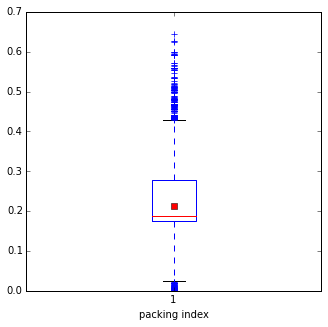

In [40]:
plt.figure(figsize=(18,5))
plt.subplot(1, 3, 1)
plt.xlabel('packing index')
plt.boxplot(dr[dr.packing_index>0].packing_index.reset_index()['packing_index'], showmeans=True, showfliers=True)
plt.show()

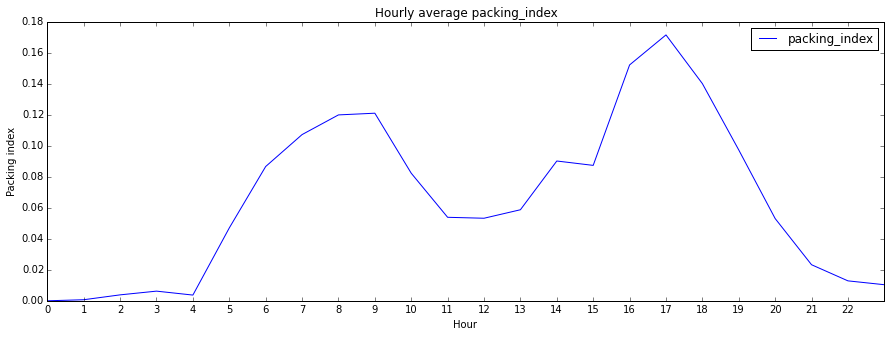

In [75]:
time = pd.DatetimeIndex(dr.timestamp)
dr_plt = dr.groupby([time.hour]).mean()
dr_plt.reset_index(inplace=True)

fig = plt.figure(figsize=(15,5))
ax = plt.gca()
dr_plt.plot(x='index', y='packing_index', ax=ax)
plt.title("Hourly average packing_index")
plt.ylabel('Packing index')
plt.xlabel('Hour')
ax.set_xticks(range(23))
plt.show()

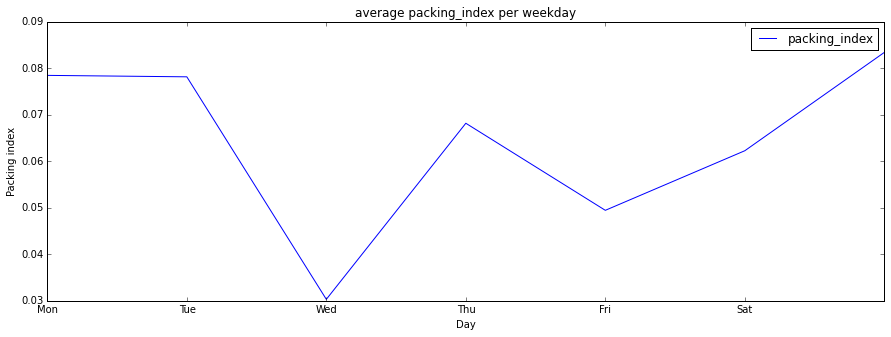

In [16]:
time = pd.DatetimeIndex(dr.timestamp)
dr_plt = dr.groupby([time.weekday]).mean()
dr_plt.reset_index(inplace=True)
dayDict = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
def f(x):
    daylabel = dayDict[x]
    return daylabel
dr_plt['daylabel'] = dr_plt['index'].apply(f)

fig = plt.figure(figsize=(15,5))
ax = plt.gca()
dr_plt.plot(x='daylabel', y='packing_index', ax=ax)
plt.title("average packing_index per weekday")
plt.ylabel('Packing index')
plt.xlabel('Day')
ax.set_xticks(range(6))
plt.show()

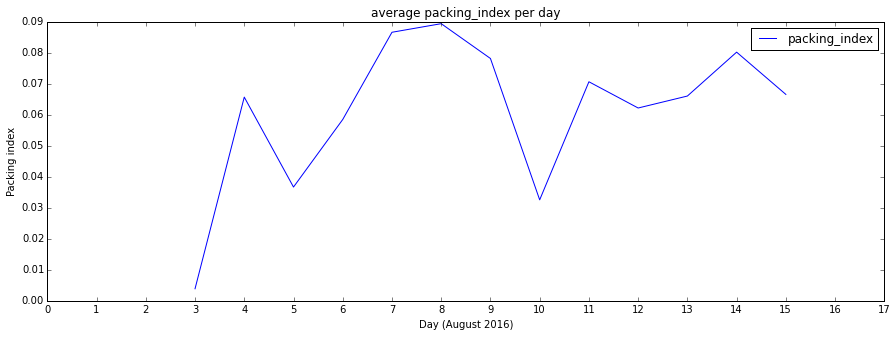

In [74]:
time = pd.DatetimeIndex(dr.timestamp)
dr_plt = dr.groupby([time.day]).mean()
dr_plt.reset_index(inplace=True)

fig = plt.figure(figsize=(15,5))
ax = plt.gca()
dr_plt.plot(x='index', y='packing_index', ax=ax)
plt.title("average packing_index per day")
plt.ylabel('Packing index')
plt.xlabel('Day (August 2016)')
ax.set_xticks(range(18))
plt.show()

Jam dataframe

In [86]:
qj = db.session.query(Jam).filter(Jam.timestamp > datetime(2016,8,4,0,0).strftime('%s')).\
                           filter(Jam.timestamp < datetime(2016,8,16,0,0).strftime('%s'))      
dj = pd.read_sql(qj.statement, qj.session.bind)
dj.set_index('id', inplace=True)
dj['timestamp'] = pd.to_datetime(dj['timestamp'],unit='s')
dj.head()

,startLongitude,endLongitude,startLatitude,endLatitude,street,severity,color,delayInSec,source,timestamp,direction
id,,,,,,,,,,,
1799,12.2699,12.2296,45.1994,45.2132,SS309,2,Medium,75,w,2016-08-03 22:36:57,West
1800,12.2699,12.2296,45.1994,45.2132,SS309,2,Medium,75,w,2016-08-03 22:37:58,West
1801,12.2699,12.2296,45.1994,45.2132,SS309,2,Medium,75,w,2016-08-03 22:38:58,West
1802,12.2699,12.2296,45.1994,45.2132,SS309,2,Medium,74,w,2016-08-03 22:40:00,West
1803,12.2699,12.2296,45.1994,45.2132,SS309,2,Medium,74,w,2016-08-03 22:41:00,West


In [104]:
time = pd.DatetimeIndex(dj.timestamp)
dj['day']=time.day
dj['hour']=time.hour

dj_time = dj.groupby([dj.day, dj.hour, dj.startLongitude, dj.endLongitude, dj.startLatitude, dj.endLatitude, dj.street, dj.severity, dj.color, dj.source, dj.direction]).count()
print 'Average traffic duration: %.2f min' % dj_time['timestamp'].mean()

Average traffic duration: 4.97 min


In [128]:
dj_dur = pd.DataFrame(dj_time['timestamp'])
dj_dur.reset_index(inplace=True)
dj_dur = dj_dur[['hour', 'timestamp']]
dj_dur.columns=['hour', 'duration']
dj_dur = dj_dur.groupby([dj_dur.hour]).mean()
dj_dur.reset_index(inplace=True)
dj_dur.head()

,hour,duration
0,0,6.000000
1,1,3.000000
2,2,2.909091
3,3,4.500000
4,4,3.800000


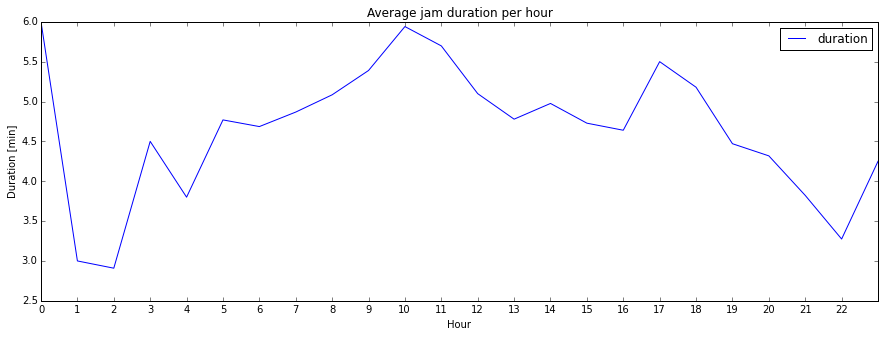

In [129]:
fig = plt.figure(figsize=(15,5))
ax = plt.gca()
dj_dur.plot(x='hour', y='duration', ax=ax)
plt.title("Average jam duration per hour")
plt.ylabel('Duration [min]')
plt.xlabel('Hour')
ax.set_xticks(range(23))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111799790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fe61c50>]], dtype=object)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


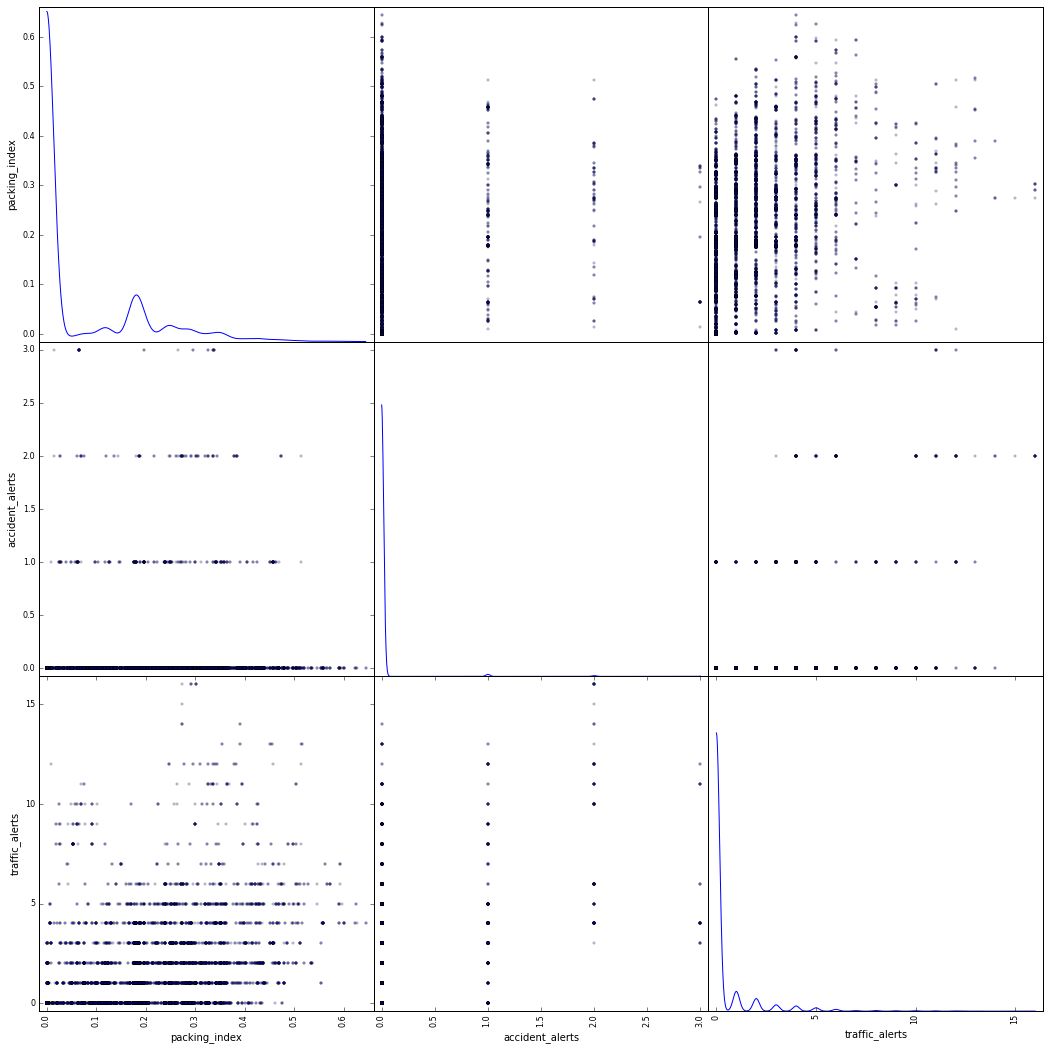

In [41]:
pd.scatter_matrix(dr, alpha=0.2, figsize=(18, 18), diagonal='kde')